In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Using TensorFlow backend.


In [2]:
df = pd.read_csv("data_making_decisions.csv")

In [3]:
df = df.set_index('time')
df.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10', 'y_decisions']

In [4]:
df

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10,y_decisions
time,,,,,,,,,,,
11.06.2019 16:11,30,30,30,30,30,30,30,30,30,30,1
11.06.2019 16:31,29,30,29,30,28,30,29,30,28,29,1
11.06.2019 16:51,30,30,30,30,30,30,30,30,30,30,1
11.06.2019 17:11,30,30,30,30,30,30,30,30,30,30,1
11.06.2019 17:31,30,30,30,30,30,30,30,30,30,30,1
11.06.2019 17:51,30,30,30,30,30,30,30,30,30,30,1
11.06.2019 18:11,30,28,30,30,30,27,30,30,28,30,1
11.06.2019 18:31,30,32,30,31,31,30,30,29,30,30,1
11.06.2019 18:51,30,31,30,30,28,30,29,30,28,29,1


In [5]:
x = df.drop('y_decisions', axis = 1)
y = df['y_decisions']

y=np.reshape(y.values, (-1,1))

scaler_x = MinMaxScaler()
print(scaler_x.fit(x))
scaler_y = MinMaxScaler()
print(scaler_y.fit(y))

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


# Variants

In [6]:
X_trans = scaler_x.transform(x)
y_trans = scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.01)

xscale=scaler_x.transform(x)
yscale=scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, train_size = 1)

# Neural Link

In [15]:
model = Sequential()
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
# Use a custom metricfunction

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

fit = model.fit(X_trans, y_trans, epochs=1000,  verbose=1, validation_split=0.01)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 48)                3120      
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                

Epoch 52/1000
17/17 [==============================] - 0s 178us/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 53/1000
17/17 [==============================] - 0s 115us/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 54/1000
17/17 [==============================] - 0s 176us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 8.4247e-05 - val_mse: 8.4247e-05
Epoch 55/1000
17/17 [==============================] - 0s 115us/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 56/1000
17/17 [==============================] - 0s 174us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 57/1000
17/17 [==============================] - 0s 174us/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 58/1000
17/17 [==============================] - 0s 115us/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 59/1000
17/17 [==========================

Epoch 109/1000
17/17 [==============================] - 0s 115us/step - loss: 3.1552e-04 - mse: 3.1552e-04 - val_loss: 2.8350e-04 - val_mse: 2.8350e-04
Epoch 110/1000
17/17 [==============================] - 0s 117us/step - loss: 3.0429e-04 - mse: 3.0429e-04 - val_loss: 2.2752e-04 - val_mse: 2.2752e-04
Epoch 111/1000
17/17 [==============================] - 0s 176us/step - loss: 2.9453e-04 - mse: 2.9453e-04 - val_loss: 1.7896e-04 - val_mse: 1.7896e-04
Epoch 112/1000
17/17 [==============================] - 0s 176us/step - loss: 2.8759e-04 - mse: 2.8759e-04 - val_loss: 1.4003e-04 - val_mse: 1.4003e-04
Epoch 113/1000
17/17 [==============================] - 0s 115us/step - loss: 2.8319e-04 - mse: 2.8319e-04 - val_loss: 1.1153e-04 - val_mse: 1.1153e-04
Epoch 114/1000
17/17 [==============================] - 0s 117us/step - loss: 2.7991e-04 - mse: 2.7991e-04 - val_loss: 9.2415e-05 - val_mse: 9.2415e-05
Epoch 115/1000
17/17 [==============================] - 0s 176us/step - loss: 2.7644e-04

Epoch 163/1000
17/17 [==============================] - 0s 115us/step - loss: 1.0347e-04 - mse: 1.0347e-04 - val_loss: 2.8646e-04 - val_mse: 2.8646e-04
Epoch 164/1000
17/17 [==============================] - 0s 174us/step - loss: 1.0150e-04 - mse: 1.0150e-04 - val_loss: 2.8486e-04 - val_mse: 2.8486e-04
Epoch 165/1000
17/17 [==============================] - 0s 117us/step - loss: 9.9722e-05 - mse: 9.9722e-05 - val_loss: 2.8443e-04 - val_mse: 2.8443e-04
Epoch 166/1000
17/17 [==============================] - 0s 176us/step - loss: 9.8027e-05 - mse: 9.8027e-05 - val_loss: 2.8480e-04 - val_mse: 2.8480e-04
Epoch 167/1000
17/17 [==============================] - 0s 115us/step - loss: 9.6322e-05 - mse: 9.6322e-05 - val_loss: 2.8770e-04 - val_mse: 2.8770e-04
Epoch 168/1000
17/17 [==============================] - 0s 176us/step - loss: 9.4509e-05 - mse: 9.4509e-05 - val_loss: 2.9318e-04 - val_mse: 2.9318e-04
Epoch 169/1000
17/17 [==============================] - 0s 176us/step - loss: 9.3074e-05

Epoch 217/1000
17/17 [==============================] - 0s 117us/step - loss: 5.0985e-05 - mse: 5.0985e-05 - val_loss: 4.0458e-04 - val_mse: 4.0458e-04
Epoch 218/1000
17/17 [==============================] - 0s 175us/step - loss: 5.0665e-05 - mse: 5.0665e-05 - val_loss: 4.1007e-04 - val_mse: 4.1007e-04
Epoch 219/1000
17/17 [==============================] - 0s 178us/step - loss: 5.0154e-05 - mse: 5.0154e-05 - val_loss: 4.1531e-04 - val_mse: 4.1531e-04
Epoch 220/1000
17/17 [==============================] - 0s 117us/step - loss: 4.9779e-05 - mse: 4.9779e-05 - val_loss: 4.1924e-04 - val_mse: 4.1924e-04
Epoch 221/1000
17/17 [==============================] - 0s 174us/step - loss: 4.9394e-05 - mse: 4.9394e-05 - val_loss: 4.2142e-04 - val_mse: 4.2142e-04
Epoch 222/1000
17/17 [==============================] - 0s 119us/step - loss: 4.9039e-05 - mse: 4.9039e-05 - val_loss: 4.2524e-04 - val_mse: 4.2524e-04
Epoch 223/1000
17/17 [==============================] - 0s 116us/step - loss: 4.8627e-05

Epoch 271/1000
17/17 [==============================] - 0s 115us/step - loss: 3.6256e-05 - mse: 3.6256e-05 - val_loss: 4.5694e-04 - val_mse: 4.5694e-04
Epoch 272/1000
17/17 [==============================] - 0s 176us/step - loss: 3.6055e-05 - mse: 3.6055e-05 - val_loss: 4.5686e-04 - val_mse: 4.5686e-04
Epoch 273/1000
17/17 [==============================] - 0s 174us/step - loss: 3.5852e-05 - mse: 3.5852e-05 - val_loss: 4.5715e-04 - val_mse: 4.5715e-04
Epoch 274/1000
17/17 [==============================] - 0s 119us/step - loss: 3.5657e-05 - mse: 3.5657e-05 - val_loss: 4.5687e-04 - val_mse: 4.5687e-04
Epoch 275/1000
17/17 [==============================] - 0s 116us/step - loss: 3.5463e-05 - mse: 3.5463e-05 - val_loss: 4.5661e-04 - val_mse: 4.5661e-04
Epoch 276/1000
17/17 [==============================] - 0s 119us/step - loss: 3.5270e-05 - mse: 3.5270e-05 - val_loss: 4.5639e-04 - val_mse: 4.5639e-04
Epoch 277/1000
17/17 [==============================] - 0s 176us/step - loss: 3.5077e-05

Epoch 325/1000
17/17 [==============================] - 0s 116us/step - loss: 2.6962e-05 - mse: 2.6962e-05 - val_loss: 4.5455e-04 - val_mse: 4.5455e-04
Epoch 326/1000
17/17 [==============================] - 0s 116us/step - loss: 2.6812e-05 - mse: 2.6812e-05 - val_loss: 4.5440e-04 - val_mse: 4.5440e-04
Epoch 327/1000
17/17 [==============================] - 0s 117us/step - loss: 2.6665e-05 - mse: 2.6665e-05 - val_loss: 4.5318e-04 - val_mse: 4.5318e-04
Epoch 328/1000
17/17 [==============================] - 0s 115us/step - loss: 2.6509e-05 - mse: 2.6509e-05 - val_loss: 4.5220e-04 - val_mse: 4.5220e-04
Epoch 329/1000
17/17 [==============================] - 0s 174us/step - loss: 2.6366e-05 - mse: 2.6366e-05 - val_loss: 4.5228e-04 - val_mse: 4.5228e-04
Epoch 330/1000
17/17 [==============================] - 0s 117us/step - loss: 2.6214e-05 - mse: 2.6214e-05 - val_loss: 4.5301e-04 - val_mse: 4.5301e-04
Epoch 331/1000
17/17 [==============================] - 0s 115us/step - loss: 2.6063e-05

Epoch 379/1000
17/17 [==============================] - 0s 176us/step - loss: 1.9703e-05 - mse: 1.9703e-05 - val_loss: 4.4635e-04 - val_mse: 4.4635e-04
Epoch 380/1000
17/17 [==============================] - 0s 119us/step - loss: 1.9584e-05 - mse: 1.9584e-05 - val_loss: 4.4582e-04 - val_mse: 4.4582e-04
Epoch 381/1000
17/17 [==============================] - 0s 116us/step - loss: 1.9468e-05 - mse: 1.9468e-05 - val_loss: 4.4567e-04 - val_mse: 4.4567e-04
Epoch 382/1000
17/17 [==============================] - 0s 117us/step - loss: 1.9351e-05 - mse: 1.9351e-05 - val_loss: 4.4581e-04 - val_mse: 4.4581e-04
Epoch 383/1000
17/17 [==============================] - 0s 175us/step - loss: 1.9235e-05 - mse: 1.9235e-05 - val_loss: 4.4572e-04 - val_mse: 4.4572e-04
Epoch 384/1000
17/17 [==============================] - 0s 117us/step - loss: 1.9120e-05 - mse: 1.9120e-05 - val_loss: 4.4530e-04 - val_mse: 4.4530e-04
Epoch 385/1000
17/17 [==============================] - 0s 116us/step - loss: 1.9005e-05

Epoch 433/1000
17/17 [==============================] - 0s 117us/step - loss: 1.4125e-05 - mse: 1.4125e-05 - val_loss: 4.3950e-04 - val_mse: 4.3950e-04
Epoch 434/1000
17/17 [==============================] - 0s 119us/step - loss: 1.4037e-05 - mse: 1.4037e-05 - val_loss: 4.3979e-04 - val_mse: 4.3979e-04
Epoch 435/1000
17/17 [==============================] - 0s 115us/step - loss: 1.3946e-05 - mse: 1.3946e-05 - val_loss: 4.4006e-04 - val_mse: 4.4006e-04
Epoch 436/1000
17/17 [==============================] - 0s 117us/step - loss: 1.3860e-05 - mse: 1.3860e-05 - val_loss: 4.3957e-04 - val_mse: 4.3957e-04
Epoch 437/1000
17/17 [==============================] - 0s 176us/step - loss: 1.3770e-05 - mse: 1.3770e-05 - val_loss: 4.3892e-04 - val_mse: 4.3892e-04
Epoch 438/1000
17/17 [==============================] - 0s 119us/step - loss: 1.3683e-05 - mse: 1.3683e-05 - val_loss: 4.3870e-04 - val_mse: 4.3870e-04
Epoch 439/1000
17/17 [==============================] - 0s 116us/step - loss: 1.3596e-05

Epoch 487/1000
17/17 [==============================] - 0s 119us/step - loss: 9.9329e-06 - mse: 9.9329e-06 - val_loss: 4.3302e-04 - val_mse: 4.3302e-04
Epoch 488/1000
17/17 [==============================] - 0s 119us/step - loss: 9.8673e-06 - mse: 9.8673e-06 - val_loss: 4.3262e-04 - val_mse: 4.3262e-04
Epoch 489/1000
17/17 [==============================] - 0s 176us/step - loss: 9.8008e-06 - mse: 9.8008e-06 - val_loss: 4.3235e-04 - val_mse: 4.3235e-04
Epoch 490/1000
17/17 [==============================] - 0s 117us/step - loss: 9.7356e-06 - mse: 9.7356e-06 - val_loss: 4.3238e-04 - val_mse: 4.3238e-04
Epoch 491/1000
17/17 [==============================] - 0s 117us/step - loss: 9.6699e-06 - mse: 9.6699e-06 - val_loss: 4.3239e-04 - val_mse: 4.3239e-04
Epoch 492/1000
17/17 [==============================] - 0s 117us/step - loss: 9.6060e-06 - mse: 9.6060e-06 - val_loss: 4.3201e-04 - val_mse: 4.3201e-04
Epoch 493/1000
17/17 [==============================] - 0s 115us/step - loss: 9.5409e-06

Epoch 541/1000
17/17 [==============================] - 0s 117us/step - loss: 6.8595e-06 - mse: 6.8595e-06 - val_loss: 4.2574e-04 - val_mse: 4.2574e-04
Epoch 542/1000
17/17 [==============================] - 0s 57us/step - loss: 6.8115e-06 - mse: 6.8115e-06 - val_loss: 4.2555e-04 - val_mse: 4.2555e-04
Epoch 543/1000
17/17 [==============================] - 0s 176us/step - loss: 6.7640e-06 - mse: 6.7640e-06 - val_loss: 4.2561e-04 - val_mse: 4.2561e-04
Epoch 544/1000
17/17 [==============================] - 0s 117us/step - loss: 6.7161e-06 - mse: 6.7161e-06 - val_loss: 4.2560e-04 - val_mse: 4.2560e-04
Epoch 545/1000
17/17 [==============================] - 0s 117us/step - loss: 6.6692e-06 - mse: 6.6692e-06 - val_loss: 4.2525e-04 - val_mse: 4.2525e-04
Epoch 546/1000
17/17 [==============================] - 0s 118us/step - loss: 6.6223e-06 - mse: 6.6223e-06 - val_loss: 4.2507e-04 - val_mse: 4.2507e-04
Epoch 547/1000
17/17 [==============================] - 0s 118us/step - loss: 6.5762e-06 

Epoch 595/1000
17/17 [==============================] - 0s 119us/step - loss: 4.6586e-06 - mse: 4.6586e-06 - val_loss: 4.1937e-04 - val_mse: 4.1937e-04
Epoch 596/1000
17/17 [==============================] - 0s 119us/step - loss: 4.6246e-06 - mse: 4.6246e-06 - val_loss: 4.1927e-04 - val_mse: 4.1927e-04
Epoch 597/1000
17/17 [==============================] - 0s 174us/step - loss: 4.5910e-06 - mse: 4.5910e-06 - val_loss: 4.1913e-04 - val_mse: 4.1913e-04
Epoch 598/1000
17/17 [==============================] - 0s 119us/step - loss: 4.5575e-06 - mse: 4.5575e-06 - val_loss: 4.1900e-04 - val_mse: 4.1900e-04
Epoch 599/1000
17/17 [==============================] - 0s 119us/step - loss: 4.5244e-06 - mse: 4.5244e-06 - val_loss: 4.1884e-04 - val_mse: 4.1884e-04
Epoch 600/1000
17/17 [==============================] - 0s 176us/step - loss: 4.4913e-06 - mse: 4.4913e-06 - val_loss: 4.1865e-04 - val_mse: 4.1865e-04
Epoch 601/1000
17/17 [==============================] - 0s 117us/step - loss: 4.4584e-06

Epoch 649/1000
17/17 [==============================] - 0s 117us/step - loss: 3.1202e-06 - mse: 3.1202e-06 - val_loss: 4.1266e-04 - val_mse: 4.1266e-04
Epoch 650/1000
17/17 [==============================] - 0s 117us/step - loss: 3.0968e-06 - mse: 3.0968e-06 - val_loss: 4.1246e-04 - val_mse: 4.1246e-04
Epoch 651/1000
17/17 [==============================] - 0s 174us/step - loss: 3.0736e-06 - mse: 3.0736e-06 - val_loss: 4.1243e-04 - val_mse: 4.1243e-04
Epoch 652/1000
17/17 [==============================] - 0s 59us/step - loss: 3.0505e-06 - mse: 3.0505e-06 - val_loss: 4.1241e-04 - val_mse: 4.1241e-04
Epoch 653/1000
17/17 [==============================] - 0s 176us/step - loss: 3.0276e-06 - mse: 3.0276e-06 - val_loss: 4.1226e-04 - val_mse: 4.1226e-04
Epoch 654/1000
17/17 [==============================] - 0s 117us/step - loss: 3.0048e-06 - mse: 3.0048e-06 - val_loss: 4.1205e-04 - val_mse: 4.1205e-04
Epoch 655/1000
17/17 [==============================] - 0s 176us/step - loss: 2.9822e-06 

Epoch 703/1000
17/17 [==============================] - 0s 176us/step - loss: 2.0714e-06 - mse: 2.0714e-06 - val_loss: 4.0593e-04 - val_mse: 4.0593e-04
Epoch 704/1000
17/17 [==============================] - 0s 117us/step - loss: 2.0555e-06 - mse: 2.0555e-06 - val_loss: 4.0576e-04 - val_mse: 4.0576e-04
Epoch 705/1000
17/17 [==============================] - 0s 176us/step - loss: 2.0401e-06 - mse: 2.0401e-06 - val_loss: 4.0565e-04 - val_mse: 4.0565e-04
Epoch 706/1000
17/17 [==============================] - 0s 115us/step - loss: 2.0245e-06 - mse: 2.0245e-06 - val_loss: 4.0548e-04 - val_mse: 4.0548e-04
Epoch 707/1000
17/17 [==============================] - 0s 117us/step - loss: 2.0092e-06 - mse: 2.0092e-06 - val_loss: 4.0523e-04 - val_mse: 4.0523e-04
Epoch 708/1000
17/17 [==============================] - 0s 175us/step - loss: 1.9940e-06 - mse: 1.9940e-06 - val_loss: 4.0511e-04 - val_mse: 4.0511e-04
Epoch 709/1000
17/17 [==============================] - 0s 117us/step - loss: 1.9788e-06

Epoch 757/1000
17/17 [==============================] - 0s 119us/step - loss: 1.3728e-06 - mse: 1.3728e-06 - val_loss: 4.0022e-04 - val_mse: 4.0022e-04
Epoch 758/1000
17/17 [==============================] - 0s 117us/step - loss: 1.3624e-06 - mse: 1.3624e-06 - val_loss: 4.0010e-04 - val_mse: 4.0010e-04
Epoch 759/1000
17/17 [==============================] - 0s 176us/step - loss: 1.3521e-06 - mse: 1.3521e-06 - val_loss: 4.0003e-04 - val_mse: 4.0003e-04
Epoch 760/1000
17/17 [==============================] - 0s 117us/step - loss: 1.3420e-06 - mse: 1.3420e-06 - val_loss: 3.9989e-04 - val_mse: 3.9989e-04
Epoch 761/1000
17/17 [==============================] - 0s 176us/step - loss: 1.3317e-06 - mse: 1.3317e-06 - val_loss: 3.9984e-04 - val_mse: 3.9984e-04
Epoch 762/1000
17/17 [==============================] - 0s 176us/step - loss: 1.3217e-06 - mse: 1.3217e-06 - val_loss: 3.9981e-04 - val_mse: 3.9981e-04
Epoch 763/1000
17/17 [==============================] - 0s 178us/step - loss: 1.3116e-06

Epoch 811/1000
17/17 [==============================] - 0s 235us/step - loss: 9.1412e-07 - mse: 9.1412e-07 - val_loss: 3.9534e-04 - val_mse: 3.9534e-04
Epoch 812/1000
17/17 [==============================] - 0s 176us/step - loss: 9.0737e-07 - mse: 9.0737e-07 - val_loss: 3.9523e-04 - val_mse: 3.9523e-04
Epoch 813/1000
17/17 [==============================] - 0s 117us/step - loss: 9.0064e-07 - mse: 9.0064e-07 - val_loss: 3.9510e-04 - val_mse: 3.9510e-04
Epoch 814/1000
17/17 [==============================] - 0s 116us/step - loss: 8.9395e-07 - mse: 8.9395e-07 - val_loss: 3.9499e-04 - val_mse: 3.9499e-04
Epoch 815/1000
17/17 [==============================] - 0s 176us/step - loss: 8.8738e-07 - mse: 8.8738e-07 - val_loss: 3.9491e-04 - val_mse: 3.9491e-04
Epoch 816/1000
17/17 [==============================] - 0s 117us/step - loss: 8.8082e-07 - mse: 8.8082e-07 - val_loss: 3.9481e-04 - val_mse: 3.9481e-04
Epoch 817/1000
17/17 [==============================] - 0s 116us/step - loss: 8.7428e-07

Epoch 865/1000
17/17 [==============================] - 0s 117us/step - loss: 6.1691e-07 - mse: 6.1691e-07 - val_loss: 3.9085e-04 - val_mse: 3.9085e-04
Epoch 866/1000
17/17 [==============================] - 0s 178us/step - loss: 6.1257e-07 - mse: 6.1257e-07 - val_loss: 3.9077e-04 - val_mse: 3.9077e-04
Epoch 867/1000
17/17 [==============================] - 0s 117us/step - loss: 6.0825e-07 - mse: 6.0825e-07 - val_loss: 3.9067e-04 - val_mse: 3.9067e-04
Epoch 868/1000
17/17 [==============================] - 0s 117us/step - loss: 6.0397e-07 - mse: 6.0397e-07 - val_loss: 3.9057e-04 - val_mse: 3.9057e-04
Epoch 869/1000
17/17 [==============================] - 0s 176us/step - loss: 5.9970e-07 - mse: 5.9970e-07 - val_loss: 3.9047e-04 - val_mse: 3.9047e-04
Epoch 870/1000
17/17 [==============================] - 0s 117us/step - loss: 5.9544e-07 - mse: 5.9544e-07 - val_loss: 3.9042e-04 - val_mse: 3.9042e-04
Epoch 871/1000
17/17 [==============================] - 0s 117us/step - loss: 5.9129e-07

Epoch 919/1000
17/17 [==============================] - 0s 176us/step - loss: 4.2643e-07 - mse: 4.2643e-07 - val_loss: 3.8651e-04 - val_mse: 3.8651e-04
Epoch 920/1000
17/17 [==============================] - 0s 176us/step - loss: 4.2364e-07 - mse: 4.2364e-07 - val_loss: 3.8649e-04 - val_mse: 3.8649e-04
Epoch 921/1000
17/17 [==============================] - 0s 175us/step - loss: 4.2082e-07 - mse: 4.2082e-07 - val_loss: 3.8642e-04 - val_mse: 3.8642e-04
Epoch 922/1000
17/17 [==============================] - 0s 116us/step - loss: 4.1812e-07 - mse: 4.1812e-07 - val_loss: 3.8633e-04 - val_mse: 3.8633e-04
Epoch 923/1000
17/17 [==============================] - 0s 176us/step - loss: 4.1542e-07 - mse: 4.1542e-07 - val_loss: 3.8625e-04 - val_mse: 3.8625e-04
Epoch 924/1000
17/17 [==============================] - 0s 117us/step - loss: 4.1269e-07 - mse: 4.1269e-07 - val_loss: 3.8619e-04 - val_mse: 3.8619e-04
Epoch 925/1000
17/17 [==============================] - 0s 176us/step - loss: 4.1004e-07

Epoch 973/1000
17/17 [==============================] - 0s 176us/step - loss: 3.0466e-07 - mse: 3.0466e-07 - val_loss: 3.8279e-04 - val_mse: 3.8279e-04
Epoch 974/1000
17/17 [==============================] - 0s 117us/step - loss: 3.0287e-07 - mse: 3.0287e-07 - val_loss: 3.8276e-04 - val_mse: 3.8276e-04
Epoch 975/1000
17/17 [==============================] - 0s 117us/step - loss: 3.0110e-07 - mse: 3.0110e-07 - val_loss: 3.8266e-04 - val_mse: 3.8266e-04
Epoch 976/1000
17/17 [==============================] - 0s 116us/step - loss: 2.9934e-07 - mse: 2.9934e-07 - val_loss: 3.8254e-04 - val_mse: 3.8254e-04
Epoch 977/1000
17/17 [==============================] - 0s 176us/step - loss: 2.9761e-07 - mse: 2.9761e-07 - val_loss: 3.8248e-04 - val_mse: 3.8248e-04
Epoch 978/1000
17/17 [==============================] - 0s 117us/step - loss: 2.9584e-07 - mse: 2.9584e-07 - val_loss: 3.8244e-04 - val_mse: 3.8244e-04
Epoch 979/1000
17/17 [==============================] - 0s 178us/step - loss: 2.9415e-07

# Testing and Experiments

In [16]:
def DFfloatToInt(result):
    for i in range(len(result)):
        for j in range(len(result[i])):
            result[i][j] = round(result[i][j])
    return result

In [17]:
print(scaler_x.inverse_transform(X_test))
ynew= model.predict(X_test)
result = pd.DataFrame(scaler_y.inverse_transform(ynew))
print((result))
print(scaler_y.inverse_transform(y_test))

[[30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]]
          0
0  1.000141
[[1.]]


In [19]:
pre = [[25, 25, 25, 25, 25, 25, 25, 25, 23, 24]]
print(pre)
ynew= model.predict(scaler_x.transform(pre))
result = pd.DataFrame(scaler_y.inverse_transform(ynew))
print((result))

[[25, 25, 25, 25, 25, 25, 25, 25, 23, 24]]
          0
0  1.193052


# Visualizations

In [20]:
def plot_train_history(history, title):
  mpl.rcParams['figure.figsize'] = (8, 6)
  mpl.rcParams['axes.grid'] = False
    
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(len(loss))

  y = []
  for i in epochs:
        y.append(0)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.plot(epochs, y, 'g', label='y = 0 axis')
  plt.xlabel('Epochs')
  plt.ylabel('MSE value or Losses')
    
  plt.title(title)
  plt.legend()

  plt.show()

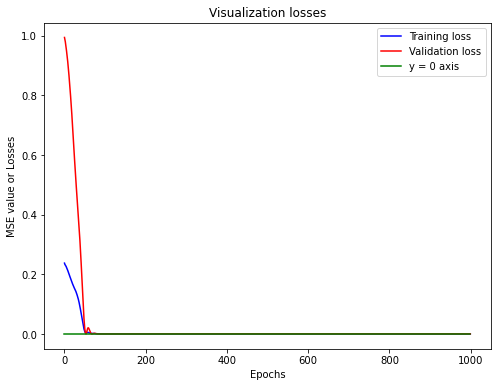

In [21]:
plot_train_history(fit,
                   'Visualization losses')

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000191C2BB8588>,
      dtype=object)

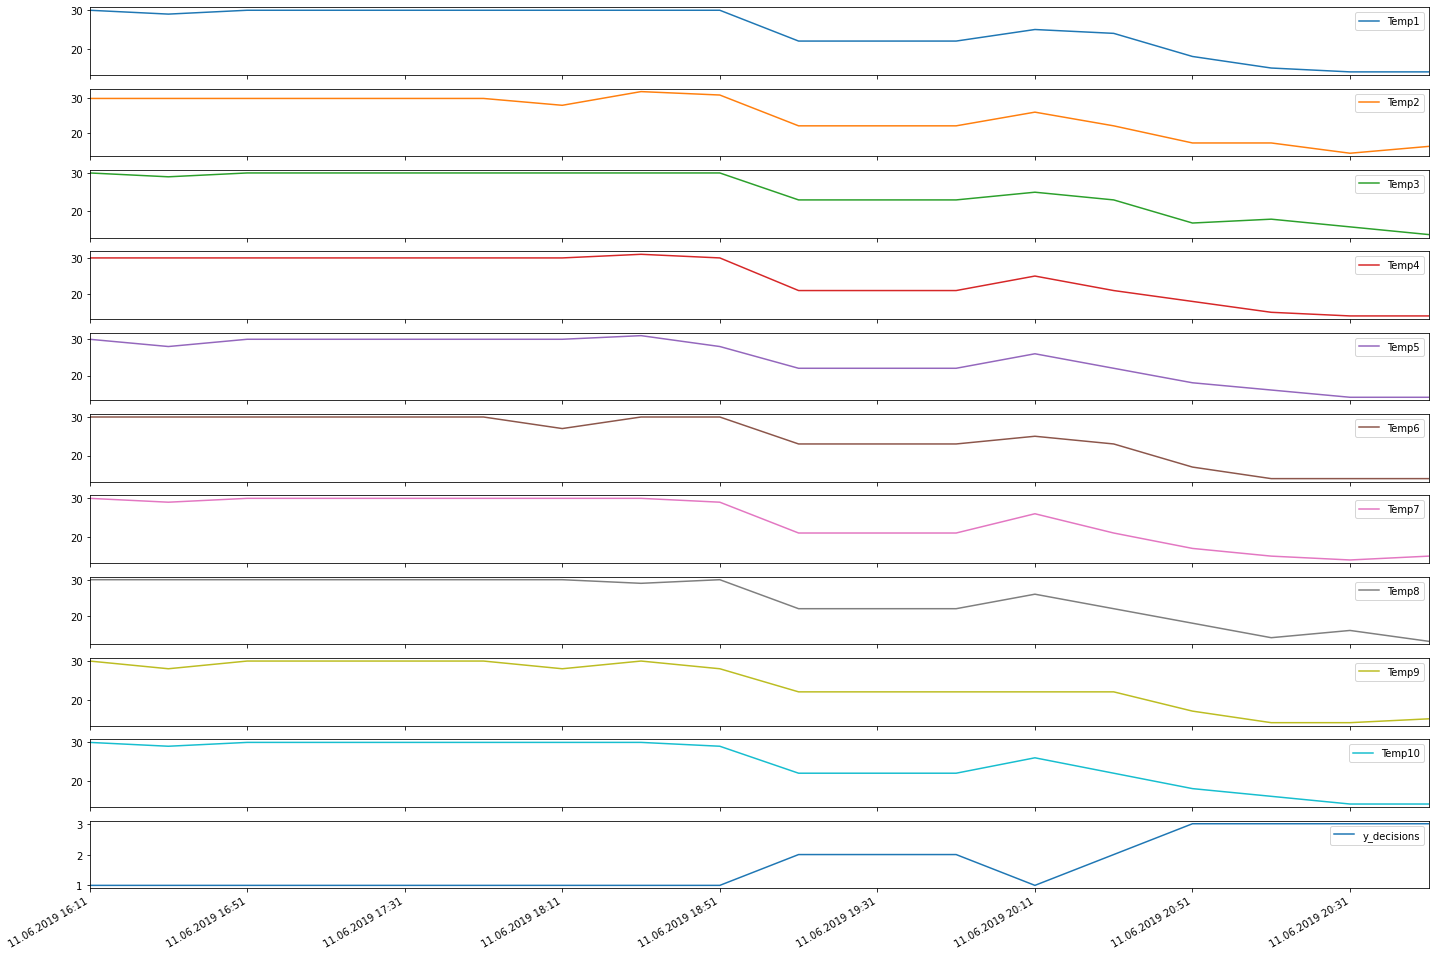

In [17]:
mpl.rcParams['figure.figsize'] = (24,18)
mpl.rcParams['axes.grid'] = False
uni_data = df
uni_data.index = list(df.index.values)
uni_data.head()
uni_data.plot(subplots=True)